# Aprendizaje no supervisado

El aprendizaje no supervisado está orientado a la **exploración** de un conjuntos de datos. En los ejemplos que trabajaremos en este laboratorio estaremos trabajando con textos. 

Una exploración efectiva, que permita la generación de hipótesis sobre el conjunto que estamos estudiando, puede combinar el uso de herramientas de visualización de los datos con el uso de métodos matemáticos más sofisticados, como _Latent Dirichlet Allocation_ (LDA) para la detección de temas. 

En los siguientes ejercicios exploraremos algunas posibilidades que ofrece Python para el aprendizaje no supervisado en texto, usando las bibliotecas matplotlib, pandas, wordcloud y sklearn.

## I. Nubes de Palabras
Las nubes de palabras son una forma de visualización muy sencilla: cuanto más veces aparezca una palabra en un documento, la palabra aparece más grande y ancha en el diagrama de nube. De este modo, con sólo ver la nube de palabras podemos tener una idea de las palabras clave en el texto y, en consecuencia, conjeturar sobre el contenido del documento. 

Para usar nubes de palabras en Python, vamos a empezar con un ejemplo muy sencillo.

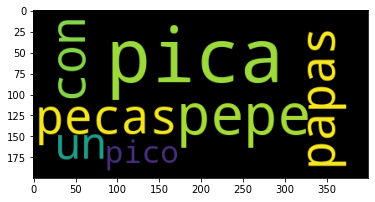

In [1]:
import matplotlib.pyplot as plt
import wordcloud

textito = 'pepe pecas pica papas con un pico pica'
nube = wordcloud.WordCloud()
nube.generate(textito)
nube.to_image()
plt.imshow(nube)
plt.show()

Ahora vamos a intentar un texto más largo en el que la frecuencia de palabras nos diga algo. Para este ejemplo vamos a usar una versión resumida del cuento de *Caperucita Roja*.

In [4]:
# abrir el archivo que contiene el texto a estudiar
archivoF = open("data/caperucitaRoja.txt", 'r')

#se lee el texto y se transforma a minúsculas
texto = archivoF.read().lower() 

archivoF.close()

Para eliminar las palabras muertas, podemos utilizar listas predefinidas en la biblioteca de Python **nltk**.

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

swSpanish = set(stopwords.words('spanish'))
swSpanish

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roicort/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Ahora es necesario "filtrar" las palabras que están en nuestra lista de stopwords:

In [8]:
palabras  = texto.split()
palabrasLimpias = [p for p in palabras if not(p in swSpanish)]
cuentoLimpio = ' '.join(palabrasLimpias)

In [9]:
print(len(palabras))
print(len(palabrasLimpias))
print(cuentoLimpio)

558
293
vez dulce niña quería madre abuela. ayudaba podía tan buena día cumpleaños abuela regaló caperuza roja. gustaba iba todas partes, pronto empezaron llamarla caperucita roja. día abuela caperucita, vivía bosque, enfermó madre caperucita pidió llevara cesta torta tarro mantequilla. caperucita aceptó encantada. - ten cuidado caperucita, entretengas bosque. - ¡sí mamá! niña caminaba tranquilamente bosque lobo vio acercó ella. - ¿dónde vas caperucita? - casa abuelita llevarle cesta torta mantequilla. - quería ir verla…. así que, ¿por hacemos carrera? ve camino aquí iré otro. - ¡vale! lobo mandó caperucita camino largo llegó casa abuelita. modo hizo pasar pequeña llamó puerta. aunque sabía cazador visto llegar. - ¿quién es?, contestó abuelita - yo, caperucita - dijo lobo - bien hija mía. pasa, pasa lobo entró, abalanzó abuelita comió bocado. puso camisón metió cama esperar llegara caperucita. pequeña entretuvo bosque cogiendo avellanas flores tardó llegar más. llegar llamó puerta. - ¿

Finalmente, usamos nuevamente la biblioteca **wordcloud** y generamos la nube de palabras que le corresponde al texto.

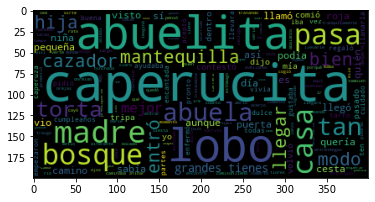

In [10]:
nubeCaperucita = wordcloud.WordCloud()
nubeCaperucita.generate(cuentoLimpio)
nubeCaperucita.to_image()
plt.imshow(nubeCaperucita)
plt.show()

### Ejercicio

Guarda un texto que quieras analizar (un discurso, otro cuento, un ensayo) en un archivo de texto. Utiliza Python para generar una nube de palabras asociada al texto. 

In [11]:
# Escribe aquí tu código


## II. Detección de temas usando LDA

Después de usar una herramienta que nos permite visualizar nuestros datos, vamos a explorar el uso de métodos más sofisticados. 

En este sección vamos a usar un conjunto de datos que corresponde a 2225 artículos de noticias en inglés publicados por la BBC (*British Broadcasting Corporation*). Cada documento corresponde a una nota periodística completa.

Para este ejercicio se han preprocesado los datos con la finalidad de eliminar signos de puntuación y dejar todos los textos usando sólo minúsculas. 

In [12]:
with open('data/cleanBBC.txt','r') as f:
    textos = f.readlines()
print(textos[0])

tv future in the hands of viewers with home theatre systems  plasma highdefinition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices  one of the most talkedabout technologies of ces has been digital and personal video recorders dvr and pvr these settop boxes  like the us s tivo and the uk s sky system  allow people to record  store  play  pause and forward wind tv programmes when they want  essentially  the technology allows for much more personalised tv they are also being builtin to highdefinition tv 

Usando la biblioteca **sklearn** transformamos nuestro conjunto de documentos a una matriz documento-término. 

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

creadorDeMatriz = CountVectorizer(stop_words='english')
matrizTextos =  creadorDeMatriz.fit_transform(textos)

matrizTextos.shape

(2225, 32442)

Para usar LDA basta con emplear la implementación también incluida en **sklearn**. Es importante especificar la cantidad de temas y de palabras que consideraremos relevantes por tema. Estos parámetros dependen del usuario y del conocimiento que se tenga de los datos. 

In [14]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

temas = 5
palabras = 10

lda = LDA(n_components = temas)
lda.fit(matrizTextos)

LatentDirichletAllocation(n_components=5)

El resultado del método que tiene sklearn es una matriz que puede ser difícil de interpretar:

In [15]:
lda.components_

array([[6.16036239e+00, 3.79054936e+01, 2.00000232e-01, ...,
        1.19553222e+00, 2.05749113e-01, 2.17798451e+00],
       [2.00122042e-01, 1.86692043e+02, 2.00000209e-01, ...,
        2.00000518e-01, 2.00000295e-01, 2.00000805e-01],
       [2.00451701e-01, 2.25811110e+02, 2.00000184e-01, ...,
        2.00000402e-01, 2.00000263e-01, 2.00000681e-01],
       [2.02474555e-01, 1.18304252e+02, 2.00000241e-01, ...,
        2.02792845e-01, 2.00000398e-01, 2.22013330e-01],
       [1.23658931e+00, 2.25287101e+02, 1.19999913e+00, ...,
        2.01674011e-01, 4.19424993e+00, 2.00000674e-01]])

Para ayudarnos a interpretar los resultados obtenidos vamos a implementar una función personalizada. De entrada, esta función necesitará conocer el modelo LDA, el modelo de la matriz término-documento y la cantidad de temas y palabras que consideramos en la construcción de nuestro resultado. 

La salida de la función será una lista con textos compuestos por las palabras más relevantes de cada tema identificado en la colección

In [16]:
import numpy as np

def verPalabrasClave(modelo,modeloVectorial,cantTemas,cantPalabras):
    palabras = modeloVectorial.get_feature_names()
    palabrasPorTema = []
    
    for i in range(cantTemas):
        tema = modelo.components_[i]
        ordenarPalabras = tema.argsort()
        topPalabras = [palabras[i] for i in ordenarPalabras[-cantPalabras:]]
        conjuntoPalabras = " ".join(topPalabras)
        palabrasPorTema.append(conjuntoPalabras)
        
        print('\n Tema ' + str(i+1)+' identificado: \n')
        print(conjuntoPalabras)
    
    return palabrasPorTema

Ahora sí, usando la función definida podemos ver las palabras clave identificadas para cada tema en la colección. ¿Puedes deducir el tema de cada grupo a partir de las palabras?

In [17]:
palabrasPorTema =  verPalabrasClave(lda,creadorDeMatriz,temas, palabras)


 Tema 1 identificado: 

ireland just cup players time win play england said game

 Tema 2 identificado: 

net use digital users mobile music new technology people said

 Tema 3 identificado: 

economy market world new growth company government year mr said

 Tema 4 identificado: 

number director won award awards new year best film said

 Tema 5 identificado: 

minister new blair party election people government labour mr said


Finalmente, podemos combinar estos resultados con las nubes de palabras que usamos en la sección anterior. Así, podríamos obtener una nube para cada tema en la colección.

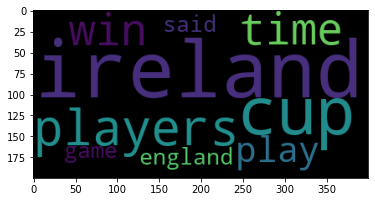

In [18]:
nubeTema1 = wordcloud.WordCloud()
nubeTema1.generate(palabrasPorTema[0])
nubeTema1.to_image()
plt.imshow(nubeTema1)
plt.show()

## III. Exploración de una base de datos en ciencia
En esta última sección se explorará una colección de abstracts de 7241 artículos científicos publicados en los últimos años sobre el tema de redes neuronales. 

Considerando que Python cuenta con bibliotecas que permiten descargar este tipo de información directamente de grandes bases de datos (web of science, ieee, etc.) este ejemplo ilustra una tarea que podría ser relevante para las ciencias de la información, específicamente para estudiar la evolución que ha tenido cierto tema de investigación.

Adicionalmente, usaremos el ejercicio para familiarizarnos con la biblioteca **pandas**.


#### Uso de pandas

In [15]:
import pandas as pd
import os

papers = pd.read_csv('data/papers.csv') # leer directamente el archivo
papers.head() # mostrar las primeras filas

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


No todas las columnas son de nuestro interés. Vamos a eliminar tres que no nos interesan. 

In [16]:
papers = papers.drop(columns = ['id', 'event_type', 'pdf_name'], axis=1)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


#### Visualización de datos

Para darnos una idea de la relevancia que ha tomado el tema de redes neuronales en los últimos años, nos apoyaremos de una gráfica que nos 
permita visualizar la producción de trabajos sobre el tema, año por año:

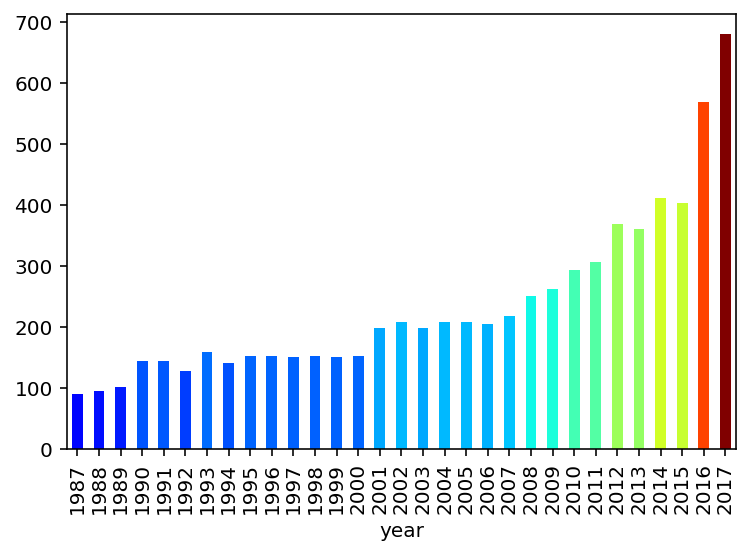

In [19]:
import matplotlib.colors as colors
from matplotlib import cm
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

grupos = papers.groupby('year')
contador = grupos.size()

esquemaColor = cm.get_cmap('jet')
colorPorConteo = map(esquemaColor, contador/float(max(contador)))

contador.plot(kind = 'bar',color=colorPorConteo)
plt.show()

#### Detección de temas principales en la colección

Para poder usar LDA, necesitamos pre-procesar nuestros datos. Específicamente, es necesario limpiar los textos correspondientes al abstract, que aparecen en la columna "paper_text". 

Primero eliminaremos los signos de puntuación:

In [17]:
import re
papers['textoLimpio'] = papers['paper_text'].map(lambda x: re.sub(r'[^\w]', ' ', x))

Después, vamos a asegurarnos de sólo incluír letras minúsculas:

In [18]:
papers['textoLimpio'] = papers['textoLimpio'].map(lambda x: x.lower())
print(papers['textoLimpio'].head())

0    767  self organization of associative database...
1    683  a mean field theory of layer iv of visual...
2    394  storing covariance by the associative lon...
3    bayesian query construction for neural network...
4    neural network ensembles  cross validation  an...
Name: textoLimpio, dtype: object


Dependiendo del poder de cómputo del equipo que estemos utilizando, podría ser interesante generar la nube de palabras de la colección completa.  Nota que esto podría consumir mucho tiempo, pues estamos lidiando con miles de documentos.

In [20]:
#long_string = ' '.join(x for x in papers['textoLimpio'])
#wordcloud = wordcloud.WordCloud()
#wordcloud.generate(long_string)
#wordcloud.to_image()
#plt.imshow(wordcloud)
#plt.show()

Finalmente, construimos la matriz término-documento correspondiente a nuestra colección y utilizamos LDA como lo hicimos en la sección anterior. 

In [21]:
creadorMatriz = CountVectorizer(stop_words='english')
M_textos = creadorMatriz.fit_transform(papers['textoLimpio'])

In [26]:
M_textos.shape

(7241, 233196)

In [ ]:
temas = 5
palabras = 10

lda = LDA(n_components = temas)
lda.fit(M_textos)

In [23]:
verPalabrasClave(lda,creadorMatriz,temas,palabras)



 Tema 1 identificado: 

bound log let matrix theorem set problem function learning algorithm

 Tema 2 identificado: 

value neural action model function policy network time state learning

 Tema 3 identificado: 

data 10 information neurons input figure network time neural model

 Tema 4 identificado: 

data neural networks deep image using model 10 training learning

 Tema 5 identificado: 

figure number learning distribution 10 using set models model data


['bound log let matrix theorem set problem function learning algorithm',
 'value neural action model function policy network time state learning',
 'data 10 information neurons input figure network time neural model',
 'data neural networks deep image using model 10 training learning',
 'figure number learning distribution 10 using set models model data']

Aunque tenemos las palabras claves, identificar correctamente los temas de la colección requiere conocimiento especializado sobre redes neuronales. Al final, Python y todas sus bibliotecas sólo pueden ayudarnos a manejar de manera más eficiente nuestra exploración de los datos, pero obtener  conclusiones al respecto y generar hipótesis de trabajo relevantes es una tarea del especialista.